# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [70]:
x_train.shape 

(60000, 784)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [64]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

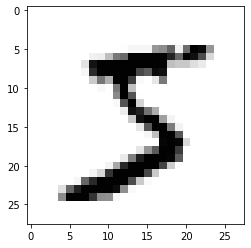

In [65]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [66]:
y_train.shape

(60000,)

In [67]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [72]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

AttributeError: module 'tensorflow.python.training.tracking.tracking' has no attribute 'cached_per_instance'

#### My Own Model 

In [49]:
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-72-9504c6d0f291> in <module>
     17 dropout_rate = 0.3
     18 model = tf.keras.Sequential([
---> 19     tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
     20     tf.keras.layers.Dense(2, activation = "sigmoid"),
     21     tf.keras.layers.Dropout(dropout_rate)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\version_utils.py in __new__(cls, *args, **kwargs)
     60 class LayerVersionSelector(object):
     61   """Chooses between Keras v1 and v2 Layer class."""
---> 62 
     63   def __new__(cls, *args, **kwargs):  # pylint: disable=unused-argument
     64     use_v2 = should_use_v2()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py in __getattr__(self, item)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py in _load(self)

C:\ProgramData\Anaconda3\lib\importlib\__init__.py in import_module(name, package)
    125                 break
    126             level += 1
--> 127     return _bootstrap._gcd_import(name[level:], package, level)
    128 
    129 

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py in _gcd_import(name, package, level)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py in _find_and_load(name, import_)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py in _find_and_load_unlocked(name, import_)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py in _load_unlocked(spec)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap_external.py in exec_module(self, module)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py in _call_with_frames_removed(f, *args, **kwds)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py in <module>
     75 
     76 # pylint: disable=g-classes-have-attributes
---> 77 class Layer(base_layer.Layer):
     78   """Base layer class.
     79 

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py in Layer()
   2315 
   2316   @property
-> 2317   @tracking.cached_per_instance
   2318   def _call_full_argspec(self):
   2319     # Argspec inspection is expensive and the call spec is used often, so it

AttributeError: module 'tensorflow.python.training.tracking.tracking' has no attribute 'cached_per_instance'

ImportError: cannot import name 'Dense' from 'keras.layers' (unknown location)

내가 만든 모델을 확인해 봅시다.

In [ ]:
위와 같은 오류가 떠서 진행이 안됩니다. 텐서플로우 삭제후 재설치도 해보고 구글링을 1시간 넘게해봤는데 오류를 못 고치겠네요..

model을 자유롭게 train 해봅시다.  

In [48]:
model.fit(x_train,y_train,batch_size=28)

NameError: name 'model' is not defined

95%이상의 성능을 가진 모델을 만들면 완성!

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)